# 1.

In [23]:
import vasicek 

### d) Unit Test

In [24]:
!pytest test_vasicek.py

============================= test session starts ==============================
platform darwin -- Python 3.10.9, pytest-7.1.2, pluggy-1.0.0
rootdir: /Users/yuanhanlim/Desktop/FM 5151
plugins: anyio-3.5.0
collected 7 items                                                              

test_vasicek.py .......                                                  [100%]

============================== 7 passed in 1.17s ===============================


### e) Analysis

### i)

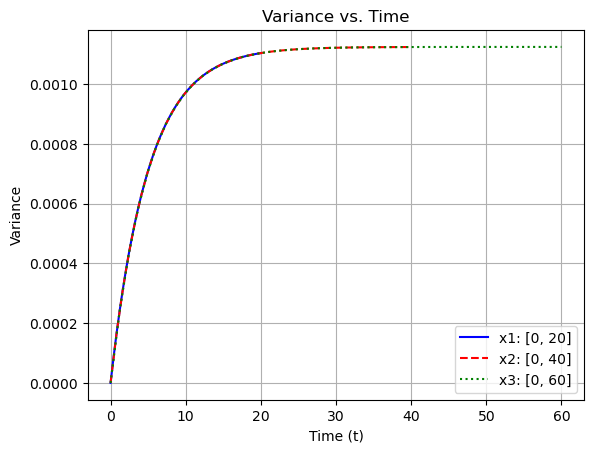

In [14]:
x1 = np.linspace(0,20)
x2 = np.linspace(0,40)
x3 = np.linspace(0,60)
y1 = vasicek.var(x1)
y2 = vasicek.var(x2)
y3 = vasicek.var(x3)

plt.plot(x1, y1, label='x1: [0, 20]', linestyle='-', color='blue')
plt.plot(x2, y2, label='x2: [0, 40]', linestyle='--', color='red')
plt.plot(x3, y3, label='x3: [0, 60]', linestyle=':', color='green')
plt.xlabel('Time (t)')
plt.ylabel('Variance')
plt.legend()
plt.title('Variance vs. Time')
plt.grid(True)
plt.show()


#### Variance stays constant as time (t) approches infinity 

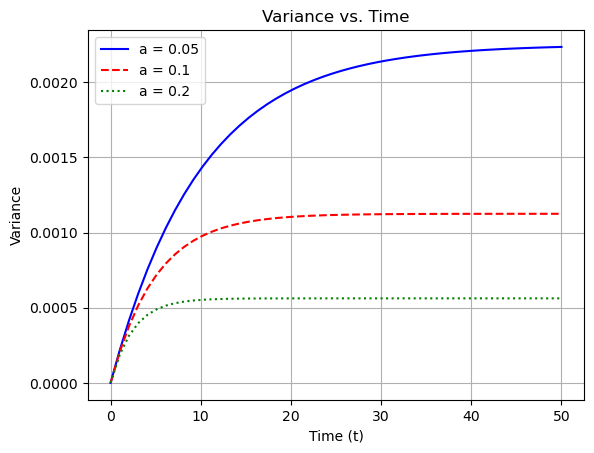

In [6]:
vasicek1 = VasicekModel(0.05,0.08,0.05,0.015)
vasicek2 = VasicekModel(0.1,0.08,0.05,0.015)
vasicek3  = VasicekModel(0.2,0.08,0.05,0.015)

x1 = np.linspace(0,50)
x2 = np.linspace(0,50)
x3 = np.linspace(0,50)
y1 = vasicek1.var(x1)
y2 = vasicek2.var(x2)
y3 = vasicek3.var(x3)

plt.plot(x1, y1, label='a = 0.05', linestyle='-', color='blue')
plt.plot(x2, y2, label='a = 0.1', linestyle='--', color='red')
plt.plot(x3, y3, label='a = 0.2', linestyle=':', color='green')
plt.xlabel('Time (t)')
plt.ylabel('Variance')
plt.legend()
plt.title('Variance vs. Time')
plt.grid(True)
plt.show()


#### 'a' affects the rate of increase of the variance, the smaller the 'a' the faster the variance will increase 

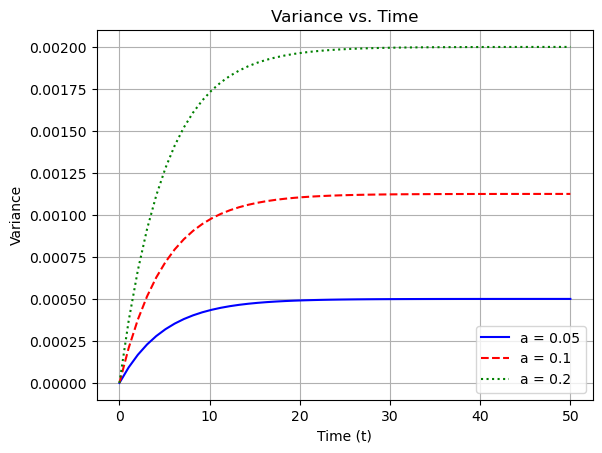

In [7]:
vasicek1 = VasicekModel(0.1,0.08,0.05,0.01)
vasicek2 = VasicekModel(0.1,0.08,0.05,0.015)
vasicek3  = VasicekModel(0.1,0.08,0.05,0.02)

x1 = np.linspace(0,50)
x2 = np.linspace(0,50)
x3 = np.linspace(0,50)
y1 = vasicek1.var(x1)
y2 = vasicek2.var(x2)
y3 = vasicek3.var(x3)

plt.plot(x1, y1, label='a = 0.05', linestyle='-', color='blue')
plt.plot(x2, y2, label='a = 0.1', linestyle='--', color='red')
plt.plot(x3, y3, label='a = 0.2', linestyle=':', color='green')
plt.xlabel('Time (t)')
plt.ylabel('Variance')
plt.legend()
plt.title('Variance vs. Time')
plt.grid(True)
plt.show()


#### sigma also affects the rate of increase of variance, the higher the volatility the faster the variance will increase

### e) ii) 

sigma - the higher the volatitlity, the higer the prices of calls and puts. As sigma increases, the short rate variance increases, thus the potential payoff will be higher for ITM options and for the OTM options, they are just going to expires worthless anyway 


a - the higer the volatility, the lower the prices of the calls and puts. As a increases, he short rate variance decreases. thus the potential payoff will be higer for the ITM options and for the OTM options, they will just expires worthless

b - the higher the b, the higher the long term mean level for future short rate, and the lower the price of the bond will be. In thos case, the price for the call option will be low and the price of the put option will be high 

# 2.

In [28]:
vasicek =  VasicekModel(0.1,0.08,0.05,0.015)

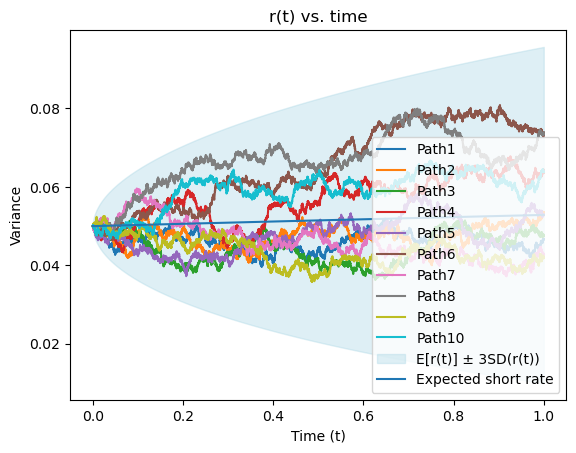

In [66]:
a, b, r0, sigma = vasicek
n = 10000
paths = 10000
T = 1
h = T/n
t = np.linspace(0, T, n)

# Generate all rate paths simultaneously
rn = np.zeros((paths, n))
rn[:, 0] = r0

for i in range(1, n):
    dW = np.random.normal(size=(paths,)) * np.sqrt(h)
    rn[:, i] = rn[:, i - 1] + a * (b - rn[:, i - 1]) * h + sigma * dW

for i, rates in enumerate(rn[:10]):
    plt.plot(t, rates, label=f'Path{i + 1}')

mean = vasicek.mean(np.array(t))
std = np.sqrt(vasicek.var(np.array(t)))
    
plt.fill_between(t, mean - 3 * std, mean + 3 * std, color='lightblue', alpha=0.4, label ='E[r(t)] ± 3SD(r(t))')
plt.plot(t, mean, label ='Expected short rate')
plt.xlabel('Time (t)')
plt.ylabel('Variance')
plt.legend()
plt.title('r(t) vs. time')
plt.show()
         

# 3.

In [83]:
class CallPayoff():
    def __init__(self, strike: float) -> None:
        self.strike = strike
        
    def __call__(self, u_t) -> float:
        return max(u_t - self.strike,0)

class PutPayoff():
    def __init__(self, strike: float) -> None:
        self.strike = strike
        
    def __call__(self, u_t) -> float:
        return max(self.strike - u_t,0)

## a)  Zero-Coupon Bond Price

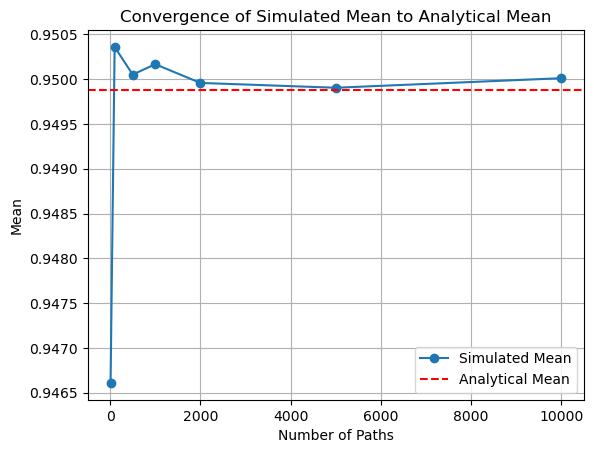

In [87]:
a, b, r0, sigma = vasicek
T = 1
n_steps = 10000
h = T / n_steps
analytical_mean = vasicek.zcb(0,1,0.05)

# List to store mean values for different numbers of paths
mean_values = []

# Vary the number of paths
paths = [10, 100, 500, 1000, 2000, 5000, 10000]

for n_paths in paths:
    rn = np.zeros((n_paths, n_steps))
    rn[:, 0] = r0

    for i in range(1, n_steps):
        dW = np.random.normal(size=(n_paths,)) * np.sqrt(h)
        rn[:, i] = rn[:, i - 1] + a * (b - rn[:, i - 1]) * h + sigma * dW

    # Calculate the mean for each case
    mean = np.mean([np.exp(-np.sum(np.array(rn[i]) * h)) for i in range(n_paths)])
    mean_values.append(mean)

# Create a plot to show the convergence
plt.plot(path_counts, mean_values, marker='o', label='Simulated Mean')
plt.axhline(analytical_mean, color='red', linestyle='--', label='Analytical Mean')
plt.xlabel('Number of Paths')
plt.ylabel('Mean')
plt.title('Convergence of Simulated Mean to Analytical Mean')
plt.legend()
plt.grid(True)
plt.show()


## b) Call Price

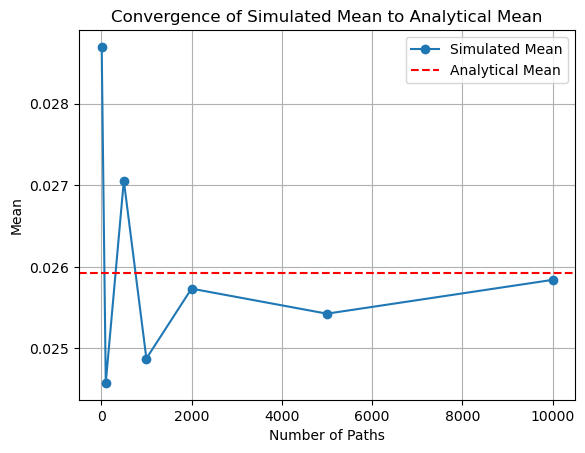

In [120]:
a, b, r0, sigma = vasicek
TO = 1
TB = 3
K = 0.87
n_steps = 10000
h = T / n_steps
analytical_mean = Bondoptions(vasicek,TO,TB,K).V_call()

# List to store mean values for different numbers of paths
mean_values = []

# Vary the number of paths
paths = [10, 100, 500, 1000, 2000, 5000, 10000]

for n_paths in paths:
    rn = np.zeros((n_paths, n_steps))
    rn[:, 0] = r0

    for i in range(1, n_steps):
        dW = np.random.normal(size=(n_paths,)) * np.sqrt(h)
        rn[:, i] = rn[:, i - 1] + a * (b - rn[:, i - 1]) * h + sigma * dW

    # Calculate the mean for each case
    mean = np.mean([np.exp(-np.sum(np.array(rn[i]) * h)) * CallPayoff(strike=K)(vasicek.zcb(TO,TB,rn[i][-1])) for i in range(n_paths)])
    mean_values.append(mean)

# Create a plot to show the convergence
plt.plot(paths, mean_values, marker='o', label='Simulated Mean')
plt.axhline(analytical_mean, color='red', linestyle='--', label='Analytical Mean')
plt.xlabel('Number of Paths')
plt.ylabel('Mean')
plt.title('Convergence of Simulated Mean to Analytical Mean')
plt.legend()
plt.grid(True)
plt.show()


## b) Put Price

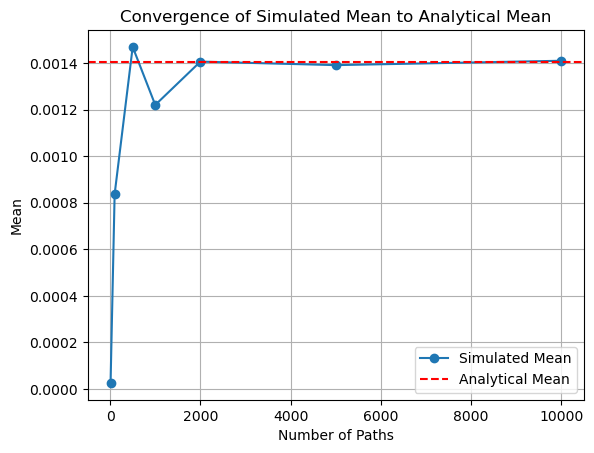

In [119]:
a, b, r0, sigma = vasicek
TO = 1
TB = 3
K = 0.87
n_steps = 10000
h = T / n_steps
analytical_mean = Bondoptions(vasicek,TO,TB,K).V_put()

# List to store mean values for different numbers of paths
mean_values = []

# Vary the number of paths
paths = [10, 100, 500, 1000, 2000, 5000, 10000]

for n_paths in paths:
    rn = np.zeros((n_paths, n_steps))
    rn[:, 0] = r0

    for i in range(1, n_steps):
        dW = np.random.normal(size=(n_paths,)) * np.sqrt(h)
        rn[:, i] = rn[:, i - 1] + a * (b - rn[:, i - 1]) * h + sigma * dW

    # Calculate the mean for each case
    mean = np.mean([np.exp(-np.sum(np.array(rn[i]) * h)) * PutPayoff(strike=K)(vasicek.zcb(TO,TB,rn[i][-1])) for i in range(n_paths)])
    mean_values.append(mean)

# Create a plot to show the convergence
plt.plot(paths, mean_values, marker='o', label='Simulated Mean')
plt.axhline(analytical_mean, color='red', linestyle='--', label='Analytical Mean')
plt.xlabel('Number of Paths')
plt.ylabel('Mean')
plt.title('Convergence of Simulated Mean to Analytical Mean')
plt.legend()
plt.grid(True)
plt.show()
